## **Proyecto Final - NLP y Deep Learning**

### Alumno: Matías Isólica


### Tema seleccionado: Análisis de extracto del libro "El caballero de la armadura oxidada"

El libro narra el viaje de un caballero medieval que, tras años de batallas y hazañas, se da cuenta de que su armadura, que alguna vez fue símbolo de honor y fuerza, se ha oxidado y pegado a su cuerpo. Atrapado en su propia coraza, el protagonista emprende un viaje de autodescubrimiento en el que deberá enfrentar sus miedos, ego y falsas creencias para liberarse no solo de su armadura física, sino también de las barreras emocionales que lo han mantenido prisionero.

El mensaje central del libro es que el verdadero valor no reside en lo que aparentamos ser, sino en el coraje de aceptar nuestras imperfecciones y abrirnos al cambio. Más que un cuento, es una invitación a cuestionar nuestras propias "armaduras" y despojarnos de ella para vivir en libertad con lo que realmente somos.

En el ámbito del Procesamiento del Lenguaje Natural (NLP) y el Deep Learning (DL), utilizar IA para comprender textos simbólicos y metafóricos como el que he seleccionado representa un buen desafío para este proyecto. Una pregunta disparadora para utilizar NLP y DL es ¿Cómo puede un modelos de NLP y DL interpretar no solo el significado narrativo, sino también las capas emocionales, filosóficas y psicológicas presentes en una narración?

Este proyecto busca explorar cómo técnicas de NLP como transformers y análisis de sentimiento pueden aplicarse para un análisis literario, sintáctico y emocional de manera automatizada y con capacidad de aprender.

### **Importación de primeras librerías y recursos de NLTK**

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PyPDF2 import PdfReader
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_es')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading averaged_perceptron_tagger_es: Package
[nltk_data]     'averaged_perceptron_tagger_es' not found in index
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\matis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### **1. Carga y extracción del texto del PDF**

In [23]:
from PyPDF2 import PdfReader
import requests
from io import BytesIO
import re

def extract_text_from_pdf(url, skip_pages=2): # Se omite la portada y la segunda página
    try:
        # Descargar el PDF
        response = requests.get(url)
        response.raise_for_status()  # Verificar que la descarga fue exitosa
        
        # Extraer texto del PDF omitiendo las primeras páginas
        with BytesIO(response.content) as f:
            reader = PdfReader(f)
            text = ""
            
            # Comenzar desde la página después de las que queremos omitir
            for page in reader.pages[skip_pages:]:
                text += page.extract_text()
                
        return text
    except Exception as e:
        print(f"Error al procesar el PDF: {e}")
        return None

# URL del libro en PDF
pdf_url = "https://ele.chaco.gob.ar/pluginfile.php/1033836/mod_resource/content/1/El-caballero-de-la-armadura-oxidada-robert-fisher.pdf"


if book_text:
    # Limpieza básica del texto
    book_text = re.sub(r'\\n', ' ', book_text)  # Reemplazar saltos de línea
    book_text = re.sub(r'\s+', ' ', book_text)  # Eliminar espacios múltiples
    
    print(f"Longitud del texto: {len(book_text)} caracteres")
    print("\nPrimeras 500 caracteres:\n")
    print(book_text[:500])
else:
    raise ValueError("No se pudo obtener el texto del PDF.")

Longitud del texto: 93178 caracteres

Primeras 500 caracteres:

EL DILEMA DEL CABALLERO Hace ya mucho tiempo, en una tierra muy lejana, vivía un caballero que pensaba que era bueno, generoso y amoroso. Hacía todo lo que suelen hacer los caballeros buenos, generosos y amoro sos. Luchaba contra sus enemigos, que era malos, mezquinos y odiosos. Mata ba a dragones y rescataba a damiselas en apuros. Cuando en el asunto de la caballería había crisis, tenía la mala costumbre de rescatar damiselas incluso cuando ellas no deseaban ser rescatadas y, debido a esto, aun


### **2. Tokenización en español**

La tokenización se utiliza para convertir texto en datos procesables por modelos de NLP y DL, convirtiendo oraciones y palabras en números que luego se podrán manipular en los modelos que desarrollaremos, como así también en la etapa de preprocesamiento. 

In [24]:
# Tokenización por oraciones
sentences = sent_tokenize(book_text, language='spanish')  # Primeras 2000 caracteres
print(f"Primeras 5 oraciones:\n")
for i, sent in enumerate(sentences[:5]):
    print(f"{i+1}. {sent}\n")

# Tokenización por palabras
words = word_tokenize(book_text, language='spanish')
print(f"\nPrimeras 30 palabras:\n{words[:30]}")


Primeras 5 oraciones:

1. EL DILEMA DEL CABALLERO Hace ya mucho tiempo, en una tierra muy lejana, vivía un caballero que pensaba que era bueno, generoso y amoroso.

2. Hacía todo lo que suelen hacer los caballeros buenos, generosos y amoro sos.

3. Luchaba contra sus enemigos, que era malos, mezquinos y odiosos.

4. Mata ba a dragones y rescataba a damiselas en apuros.

5. Cuando en el asunto de la caballería había crisis, tenía la mala costumbre de rescatar damiselas incluso cuando ellas no deseaban ser rescatadas y, debido a esto, aunque mucha s damas le estaban agradecidas, otras tantas se mostrab an furiosas con el caballero.


Primeras 30 palabras:
['EL', 'DILEMA', 'DEL', 'CABALLERO', 'Hace', 'ya', 'mucho', 'tiempo', ',', 'en', 'una', 'tierra', 'muy', 'lejana', ',', 'vivía', 'un', 'caballero', 'que', 'pensaba', 'que', 'era', 'bueno', ',', 'generoso', 'y', 'amoroso', '.', 'Hacía', 'todo']


### **3. Remoción de Stopwords en español**

Eliminaremos palabras comunes que no aportan significado, haciendo así más eficiente el preprocesamiento y los modelos.

In [25]:
# Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

# Añadimos signos de puntuación
stop_words.update(string.punctuation)
stop_words.update(['¿', '¡', '...'])

# Filtramos las stopwords
filtered_words = [word for word in words if word.lower() not in stop_words]

print("Palabras originales:", len(words))
print("Palabras después de remover stopwords:", len(filtered_words))
print("\nEjemplo de palabras filtradas:")
print(filtered_words[:30])

Palabras originales: 19242
Palabras después de remover stopwords: 8591

Ejemplo de palabras filtradas:
['DILEMA', 'CABALLERO', 'Hace', 'tiempo', 'tierra', 'lejana', 'vivía', 'caballero', 'pensaba', 'bueno', 'generoso', 'amoroso', 'Hacía', 'suelen', 'hacer', 'caballeros', 'buenos', 'generosos', 'amoro', 'sos', 'Luchaba', 'enemigos', 'malos', 'mezquinos', 'odiosos', 'Mata', 'ba', 'dragones', 'rescataba', 'damiselas']


### **4. Lematización y Stemming en español**

Reduciremos las palabras a su forma base, para evitar duplicidad de palabras que tienen igual significado pero diferentes prefijos. sufijos o tiempos verbales. 

In [26]:
# Inicializamos el stemmer y lematizador para español
stemmer = SnowballStemmer('spanish')
lemmatizer = WordNetLemmatizer()

# Lematización
lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in filtered_words if word.isalpha()]

print("Ejemplo de lematización:")
for i in range(min(20, len(lemmatized_words)), min(30, len(lemmatized_words))):
    print(f"{filtered_words[i]} -> {lemmatized_words[i]}")

# Stemming
stemmed_words = [stemmer.stem(word.lower()) for word in filtered_words if word.isalpha()]

print("\nEjemplo de stemming:")
for i in range(min(20, len(stemmed_words)), min(30, len(stemmed_words))):
    print(f"{filtered_words[i]} -> {stemmed_words[i]}")

Ejemplo de lematización:
Luchaba -> luchaba
enemigos -> enemigos
malos -> malos
mezquinos -> mezquinos
odiosos -> odiosos
Mata -> mata
ba -> ba
dragones -> dragones
rescataba -> rescataba
damiselas -> damiselas

Ejemplo de stemming:
Luchaba -> luch
enemigos -> enemig
malos -> mal
mezquinos -> mezquin
odiosos -> odios
Mata -> mat
ba -> ba
dragones -> dragon
rescataba -> rescat
damiselas -> damisel


### **5. POS Tagging en español**

Este proceso lo realizamos para asignar etiquetas gramaticales (como sustantivo, verbo, adjetivo, etc.) a cada palabra de un texto, según su contexto y función en la oración. Es fundamental para tareas avanzadas de NLP porque ayuda a entender la estructura y el significado lingüístico del texto, mejora la lematización y el stemming. 

In [27]:
# Tomamos una muestra de texto para el POS tagging
sample_text = book_text[500:800]
sample_words = word_tokenize(sample_text, language='spanish')

# Filtramos signos de puntuación y palabras vacías
sample_words = [word for word in sample_words if word.isalpha() and word.lower() not in stop_words]

# POS tagging (usamos el tagger en inglés como aproximación)
tagged_words = pos_tag(sample_words)

print("Ejemplo de POS tagging:")
for word, tag in tagged_words[:20]:
    print(f"{word:15} -> {tag}")

Ejemplo de POS tagging:
mucha           -> NN
s               -> NN
damas           -> NN
agradecidas     -> NN
tantas          -> NNS
mostrab         -> VBP
an              -> DT
furiosas        -> NN
caballero       -> NN
aceptaba        -> NN
filosofía       -> NN
Después         -> NNP
puede           -> NN
contentar       -> NN
mundo           -> NN
caballero       -> NN
famoso          -> NN
armadura        -> NN
Reflejaba       -> NNP
rayos           -> NN


### **6. Análisis de sentimiento**
Realizaremos un análisis de sentimientos en el texto.

In [28]:
import spacy
from textblob import TextBlob
from spacy.tokens import Doc

# Configurar la extensión para polaridad si no existe
if not Doc.has_extension("polarity"):
    Doc.set_extension("polarity", default=None)
if not Doc.has_extension("subjectivity"):
    Doc.set_extension("subjectivity", default=None)

# Cargar el modelo de spaCy para español
nlp = spacy.load('es_core_news_md')

def analyze_sentiment(text):
    """Analiza el sentimiento de un texto usando TextBlob a través de spaCy"""
    doc = nlp(text)
    
    # Usamos TextBlob directamente para el análisis de sentimientos
    blob = TextBlob(str(doc))
    
    # Asignamos los valores a las extensiones
    doc._.polarity = blob.sentiment.polarity
    doc._.subjectivity = blob.sentiment.subjectivity
    
    # Determinar la etiqueta de sentimiento
    if doc._.polarity > 0.1:
        sentiment = "positivo"
    elif doc._.polarity < -0.1:
        sentiment = "negativo"
    else:
        sentiment = "neutral"
    
    return {
        "polaridad": doc._.polarity,
        "subjetividad": doc._.subjectivity,
        "sentimiento": sentiment,
        "texto": text
    }

# Analizamos el sentimiento de las oraciones
print("Análisis de sentimientos con spaCy y TextBlob (en español):")
for i, sentence in enumerate(sentences[:6]):
    try:
        result = analyze_sentiment(sentence)
        print(f"\nOración {i+1}:")
        print(sentence)
        print(f"Polaridad: {result['polaridad']:.3f} (Sentimiento: {result['sentimiento']})")
        print(f"Subjetividad: {result['subjetividad']:.3f}")
    except Exception as e:
        print(f"\nError analizando la oración {i+1}: {str(e)}")
        print(f"Texto problemático: {sentence}")

Análisis de sentimientos con spaCy y TextBlob (en español):

Oración 1:
EL DILEMA DEL CABALLERO Hace ya mucho tiempo, en una tierra muy lejana, vivía un caballero que pensaba que era bueno, generoso y amoroso.
Polaridad: 0.000 (Sentimiento: neutral)
Subjetividad: 0.000

Oración 2:
Hacía todo lo que suelen hacer los caballeros buenos, generosos y amoro sos.
Polaridad: 0.000 (Sentimiento: neutral)
Subjetividad: 0.000

Oración 3:
Luchaba contra sus enemigos, que era malos, mezquinos y odiosos.
Polaridad: 0.000 (Sentimiento: neutral)
Subjetividad: 0.000

Oración 4:
Mata ba a dragones y rescataba a damiselas en apuros.
Polaridad: 0.000 (Sentimiento: neutral)
Subjetividad: 0.000

Oración 5:
Cuando en el asunto de la caballería había crisis, tenía la mala costumbre de rescatar damiselas incluso cuando ellas no deseaban ser rescatadas y, debido a esto, aunque mucha s damas le estaban agradecidas, otras tantas se mostrab an furiosas con el caballero.
Polaridad: 0.000 (Sentimiento: neutral)
Subj

### **7. TF-IDF**

Es una técnica estadística utilizada para medir la importancia de una palabra en un documento dentro de una colección de textos (corpus). Combina dos métricas:

- Frecuencia del término (TF): scoring para ponderar con qué frecuencia aparece una palabra en un documento
- Frecuencia inversa del documento (IDF): scoring para ponderar 1ué tan rara o común es la palabra en todo el corpus

Finalmente, se multiplican esos dos valores y se obtiene el peso TF-IDF, donde un valor alto indica que la palabra es importante en el documento, y viceversa. 

In [29]:
# Dividimos el texto en secciones 
sections = re.split(r'CAP[ÍI]TULO [IVXLCDM]+', book_text)
if len(sections) <= 1:  # Si no se encontraron capítulos
    num_sections = 3  # Dividimos en 3 partes
    section_length = len(book_text) // num_sections
    sections = [book_text[i * section_length:(i + 1) * section_length] for i in range(num_sections)]

section_titles = [f"Sección {i+1}" for i in range(len(sections))]

# Creamos el vectorizador TF-IDF para español
vectorizer = TfidfVectorizer(stop_words=stopwords.words('spanish'), max_features=20)
tfidf_matrix = vectorizer.fit_transform(sections)

# Obtenemos las palabras más importantes
feature_names = vectorizer.get_feature_names_out()

# Mostramos las palabras más importantes por sección
for i, section in enumerate(sections):
    print(f"\n{section_titles[i]} - Palabras más importantes:")
    # Obtenemos los scores TF-IDF para esta sección
    tfidf_scores = tfidf_matrix[i].toarray().flatten()
    # Creamos un diccionario palabra:score
    word_scores = dict(zip(feature_names, tfidf_scores))
    # Ordenamos por score descendente
    sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)
    # Mostramos las top 10
    for word, score in sorted_words[:10]:
        print(f"{word}: {score:.3f}")


Sección 1 - Palabras más importantes:
caballero: 0.827
merlín: 0.353
armadura: 0.231
dijo: 0.208
julieta: 0.145
si: 0.121
tiempo: 0.098
vez: 0.087
ardilla: 0.075
cómo: 0.075

Sección 2 - Palabras más importantes:
caballero: 0.785
castillo: 0.259
dijo: 0.253
rey: 0.223
ardilla: 0.200
rebeca: 0.200
merlín: 0.160
si: 0.133
tan: 0.106
vez: 0.106

Sección 3 - Palabras más importantes:
caballero: 0.810
dijo: 0.254
sam: 0.230
rebeca: 0.179
vez: 0.165
ardilla: 0.158
castillo: 0.158
merlín: 0.158
mismo: 0.144
si: 0.144


### **Visualización de Resultados**

Creamos algunas visualizaciones simples.

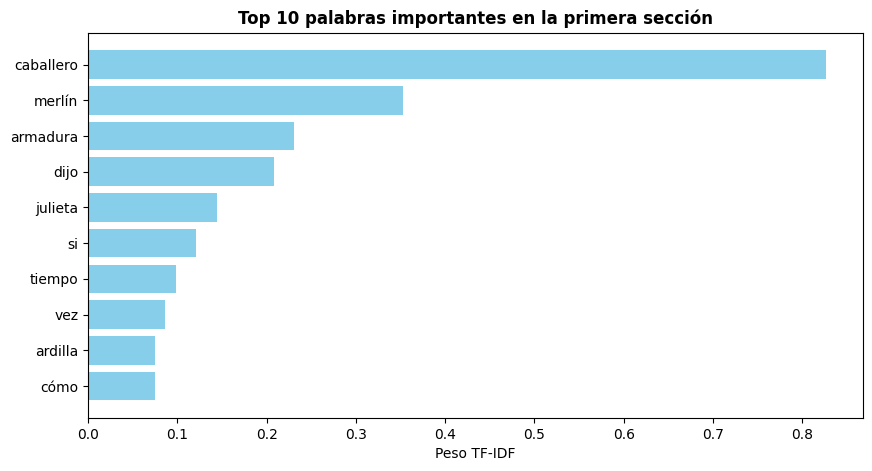

In [30]:
# Gráfico de palabras más importantes en la primera sección
first_section_scores = tfidf_matrix[0].toarray().flatten()
word_scores = dict(zip(feature_names, first_section_scores))
sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:10]

words = [w[0] for w in sorted_words]
scores = [w[1] for w in sorted_words]

plt.figure(figsize=(10, 5))
plt.barh(words, scores, color='skyblue')
plt.xlabel('Peso TF-IDF')
plt.title('Top 10 palabras importantes en la primera sección', fontweight='bold')
plt.gca().invert_yaxis()
plt.show()

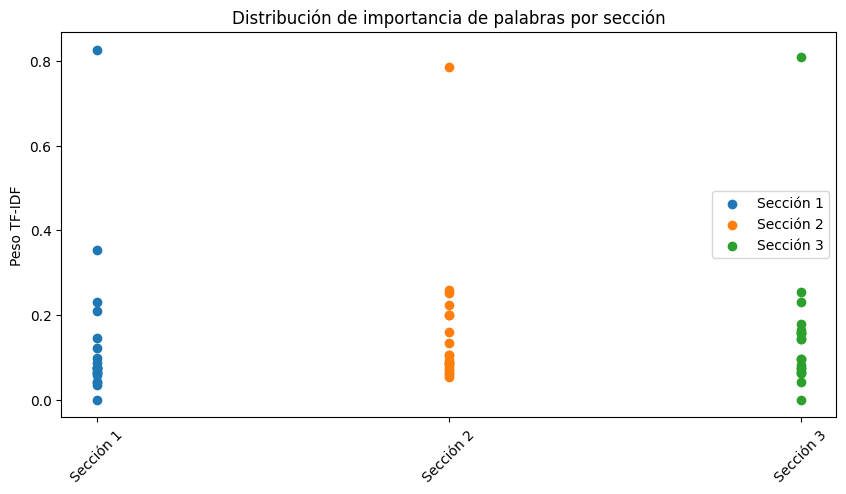

In [31]:
# Gráfico de dispersión de palabras importantes por sección
plt.figure(figsize=(10, 5))
for i in range(len(sections)):
    section_scores = tfidf_matrix[i].toarray().flatten()
    plt.scatter([i] * len(feature_names), section_scores, label=section_titles[i])

plt.xticks(range(len(sections)), section_titles, rotation=45)
plt.ylabel('Peso TF-IDF')
plt.title('Distribución de importancia de palabras por sección')
plt.legend()
plt.show()

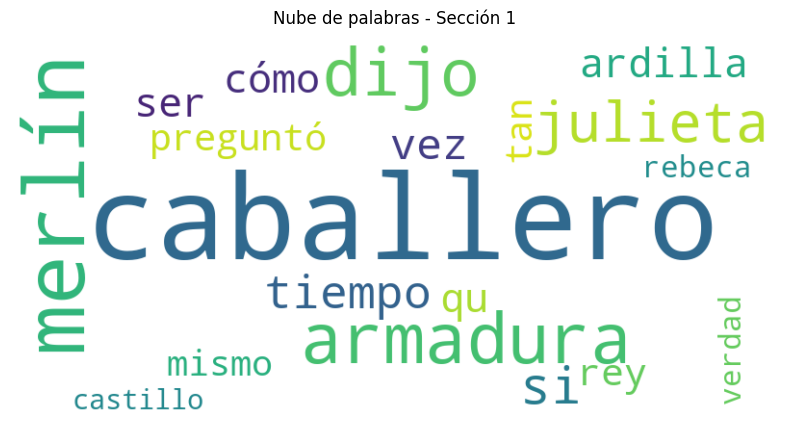

In [32]:
# Nube de palabras para la primera sección

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Sección 1')
plt.show()

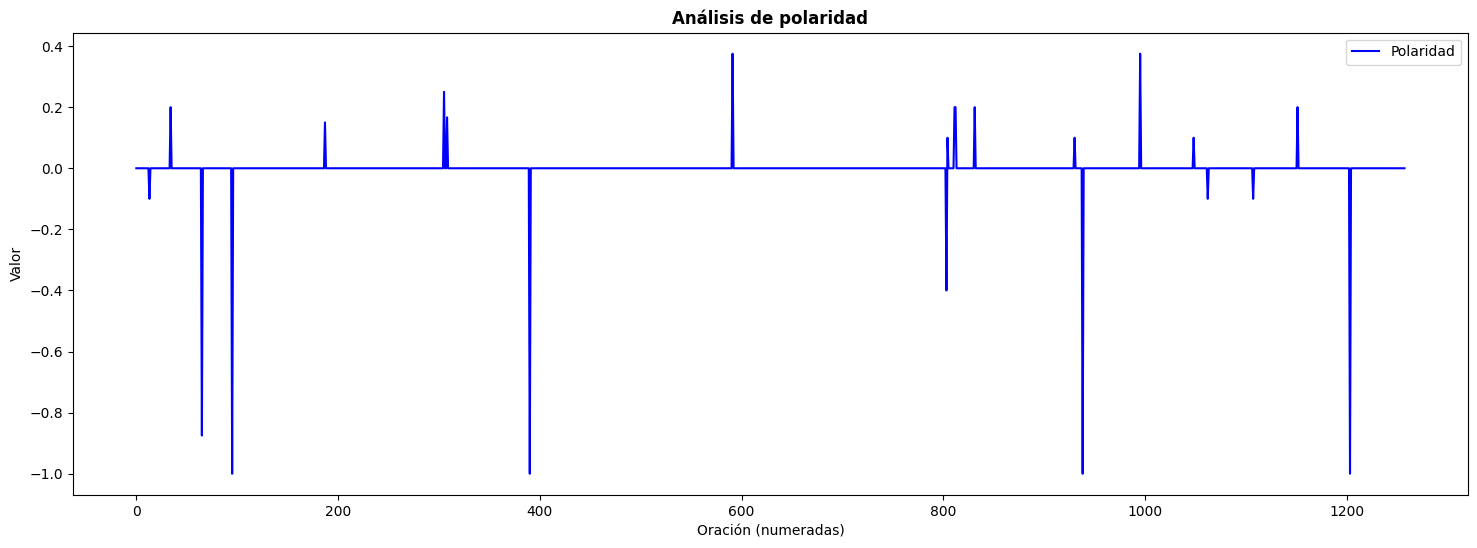

In [33]:
# Graficamos el análisis de sentimientos a partir de lo procesado con spacy y TextBlob

polarities = [analyze_sentiment(sent)['polaridad'] for sent in sentences]

plt.figure(figsize=(18, 6))
plt.plot(polarities, label='Polaridad', color='blue')
plt.title('Análisis de polaridad', fontweight='bold')
plt.xlabel('Oración (numeradas)')
plt.ylabel('Valor')
plt.legend()
plt.show()




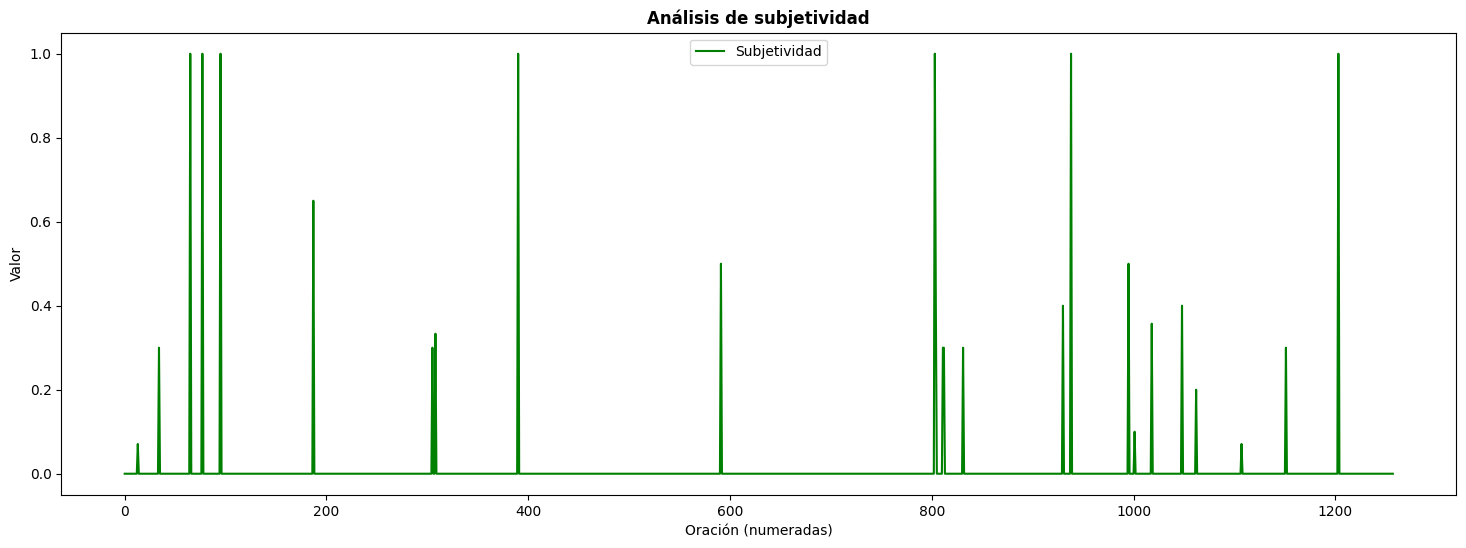

In [34]:
subjectivities = [analyze_sentiment(sent)['subjetividad'] for sent in sentences]

plt.figure(figsize=(18, 6))
plt.plot(subjectivities, label='Subjetividad', color='green')
plt.title('Análisis de subjetividad', fontweight='bold')
plt.xlabel('Oración (numeradas)')
plt.ylabel('Valor')
plt.legend()
plt.show()


Se observa que en el segundo tercio del documento hay menos polaridad y subjetividad. En el último tercio hay mayor polaridad y subjetividad que en el primero. 

### Modelado con Deep Learning
 
Este código implementa un sistema de procesamiento de lenguaje natural (NLP) que combina dos tareas fundamentales en el análisis de textos literarios:

Clasificación automática de fragmentos textuales en dos categorías: "narrativo" (descripción de acciones/eventos) y "reflexivo" (pensamientos profundos o introspección).

Generación automática de resúmenes para los textos clasificados como reflexivos, utilizando modelos de última generación.

Contexto y Objetivos
El proyecto se desarrolla en el marco del análisis de obras literarias como "El caballero de la armadura oxidada", donde distinguir entre narración y reflexión permite:

Analizar la estructura del texto

Identificar pasajes clave para estudio filosófico/psicológico

Automatizar la creación de resúmenes temáticos

Flujo del Proceso
Preprocesamiento:

Tokenización y vectorización de textos

Padding para estandarizar longitudes

Codificación de etiquetas

Modelado:

Red neuronal con capas Embedding + LSTM para clasificación binaria

Modelo T5 (Transformer) preentrenado para generación de resúmenes

Pipeline Integrado:

Clasificación de nuevos textos

Generación condicional de resúmenes según categoría

### Importación de librerías

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
import numpy as np
from transformers import pipeline

### Clasificación binaria de fragmentos de oraciones

In [36]:
# Datos de ejemplo (fragmento del libro clasificado en narrativa o reflexión manualmente)
data = [
    ("El caballero se encontraba atrapado en su armadura sin poder salir, reflexionando sobre su vida y sus errores.", "reflexivo"),
    ("Con la ayuda del mago Merlín, comenzó un viaje de autodescubrimiento en busca de respuestas.", "narrativo"),
    ("Después de atravesar múltiples pruebas, finalmente comprendió la importancia del amor y la humildad.", "reflexivo"),
    ("Llegó a un castillo misterioso donde debía enfrentar sus miedos para avanzar.", "narrativo"),
    ("Al liberarse de su armadura, el caballero descubrió la libertad de ser su verdadero yo.", "reflexivo"),
    ("El caballero regresó a su reino como un hombre nuevo, listo para vivir con autenticidad y valentía.", "narrativo"),
    ("En su camino, encontró a otros personajes que lo ayudaron a comprender la importancia de la empatía y la compasión.", "reflexivo"),
    ("El caballero se enfrentó a dragones y monstruos, demostrando su coraje y determinación.", "narrativo"),
    ("Quizá siempre os habéis tomado la verdad como un insulto", "reflexivo"),
    ("El caballero se encogió de hombros y sorbió el líquido por la caña", "narrativo"),
    (" Los primeros sorbos le parecieron amargos, los siguientes más agradables, y los últimos tragos fueros bastante deliciosos", "reflexivo")
    ]

textos, etiquetas = zip(*data)

### Tokenización para clasificación

In [37]:
max_vocab = 5000
max_len_texto = 20

tokenizer_texto = Tokenizer(num_words=max_vocab, oov_token="<OOV>")
tokenizer_texto.fit_on_texts(textos)
sequences_texto = tokenizer_texto.texts_to_sequences(textos)
padded_textos = pad_sequences(sequences_texto, maxlen=max_len_texto, padding='post')

### Mapping de etiquetas y modelo de clasificación con LSTM

In [38]:
label_map = {"narrativo": 0, "reflexivo": 1}
etiquetas_numericas = np.array([label_map[label] for label in etiquetas])

# Construcción del modelo de clasificación
embedding_dim = 128
lstm_units = 256

inputs = Input(shape=(max_len_texto,))
embedding = Embedding(input_dim=max_vocab, output_dim=embedding_dim)(inputs)
lstm = LSTM(lstm_units)(embedding)
outputs = Dense(1, activation='sigmoid')(lstm)

model_clasificacion = Model(inputs, outputs)
model_clasificacion.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo de clasificación
model_clasificacion.fit(padded_textos, etiquetas_numericas, epochs=10, batch_size=2)

Epoch 1/10
6/6 [==============================] - 1s 7ms/step - loss: 0.7061 - accuracy: 0.4545
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.6787 - accuracy: 0.6364
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.6219 - accuracy: 0.8182
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.3157 - accuracy: 0.7273
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0565 - accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 0s 7ms/step - loss: 3.9154e-04 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 0s 7ms/step - loss: 2.3610e-04 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 0s 7ms/step - loss: 1.6957e-04 - accuracy: 1.0000


### Transformers para generar resumen

In [39]:
# Modelo de resumen con T5 para textos reflexivos
t5_pipeline = pipeline("summarization", model="t5-small")

def generar_resumen(texto):
    return t5_pipeline(texto, max_length=50, min_length=10, do_sample=False)[0]['summary_text']

# Ejemplo de clasificación y resumen
ejemplo_texto = "El caballero comprende que el amor no se trata de poseer sino de dar."

# Clasificación
secuencia = tokenizer_texto.texts_to_sequences([ejemplo_texto])
padded_secuencia = pad_sequences(secuencia, maxlen=max_len_texto, padding='post')
prediccion = model_clasificacion.predict(padded_secuencia)
tipo_texto = "reflexivo" if prediccion[0] > 0.5 else "narrativo"

# Generación de resumen según tipo
if tipo_texto == "reflexivo":
    print("\nTexto clasificado como: reflexivo")
    print("Resumen generado:", generar_resumen(ejemplo_texto))
else:
    print("\nTexto clasificado como: narrativo")
    print("Para textos narrativos, se recomienda usar el modelo T5 también:")
    print("Resumen generado:", generar_resumen(ejemplo_texto))

Device set to use cpu


1/1 [==============================] - 0s 164ms/step


Your max_length is set to 50, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)



Texto clasificado como: reflexivo
Resumen generado: el amor no se trata de poseer sino de dar.
